# Previsão do risco de inadimplência no Brasil a partir de variáveis macroeconômicas e indicadores de crédito.

## 1. Definição do Problema e Objetivos de Negócio

### Introdução 

A inadimplência representa um dos principais desafios para a estabilidade financeira e o crescimento econômico de um país.  
No Brasil, o comportamento da inadimplência é fortemente influenciado por variáveis macroeconômicas como desemprego, taxa de juros, inflação e renda das famílias.  
Em períodos de crise, oscilações nesses indicadores afetam diretamente a capacidade de pagamento dos consumidores, pressionando o sistema financeiro e limitando o acesso ao crédito.

Antecipar variações na inadimplência é uma tarefa estratégica para instituições financeiras, órgãos reguladores e tomadores de decisão.  
Com base nisso, este projeto propõe a construção de um modelo preditivo que estima, com base em séries temporais e indicadores econômicos agregados, a taxa de inadimplência mensal no Brasil.

Utilizando dados públicos do Banco Central do Brasil (BACEN) e do Instituto Brasileiro de Geografia e Estatística (IBGE), a proposta é integrar variáveis econômicas e de crédito para entender e prever o comportamento da inadimplência em âmbito nacional.

Além da construção de modelos de machine learning, o projeto foca na explicabilidade dos resultados e na análise de impacto das variáveis mais relevantes, buscando oferecer insights úteis tanto para análise econômica quanto para aplicações práticas em concessão de crédito, avaliação de risco e planejamento financeiro.

Este trabalho une fundamentos de economia aplicada, engenharia de dados e inteligência artificial para propor uma abordagem eficiente e realista de previsão de risco no cenário macroeconômico brasileiro.

### Justificativa

A inadimplência no Brasil é altamente sensível a flutuações macroeconômicas. Oscilações na taxa de juros, desemprego e comprometimento de renda impactam diretamente o crédito e o consumo. Antecipar movimentos de inadimplência com base em tendências econômicas ajuda:

- Instituições financeiras a calibrar o crédito de forma prudente;
- O governo a planejar políticas de estímulo ou contenção;
- A sociedade a entender os riscos sistêmicos da economia.

Este projeto, portanto, oferece uma solução preditiva com potencial de impacto prático e social, ao combinar ciência de dados com economia aplicada.

### Objetivos

#### Objetivo Geral:
Desenvolver um modelo de machine learning capaz de prever a taxa de inadimplência no Brasil com base em dados agregados de crédito e indicadores econômicos, como taxa de juros, inflação, comprometimento de renda e desemprego.

#### Objetivos Específicos:
- Coletar e integrar dados mensais públicos do BACEN e do IBGE, desde 2012 até o período mais recente;
- Realizar análise exploratória das variáveis macroeconômicas associadas ao comportamento da inadimplência ao longo do tempo;
- Construir variáveis derivadas, como médias móveis e variações percentuais, para enriquecer o conjunto de atributos;
- Treinar e avaliar modelos de regressão e classificação para prever a inadimplência futura;
- Interpretar os fatores mais relevantes, identificando os principais determinantes macroeconômicos da inadimplência;
- Visualizar e comunicar os resultados de forma clara, com gráficos de tendência, correlação e importância de variáveis.

### 🔧 PROPOSTA DE MODELAGEM
Tipo de problema 
Regressão: prever o valor numérico da taxa de inadimplência no próximo mês.

Variáveis previstas (target)
inadimplencia_pf


## 2. Preparação dos Dados: Coleta, Limpeza e Unificação

Este projeto utiliza dados públicos provenientes de duas fontes principais:

### 📌 Banco Central do Brasil (BACEN)

Por meio da API de séries temporais do SGS (Sistema Gerenciador de Séries Temporais), foram coletadas variáveis relacionadas ao crédito, endividamento e juros no Brasil. Os dados são mensais e agregados a nível nacional.

As séries selecionadas incluem:

| Série | Código SGS | Descrição |
|-------|------------|-----------|
| Inadimplência de crédito PF            | 4513   | Percentual de inadimplência em operações de crédito para pessoas físicas |
| Concessão de crédito PF                | 20611  | Valor total de novos créditos concedidos no mês |
| Saldo de crédito PF                    | 20542  | Total em aberto de operações de crédito |
| Crédito pessoal PF                     | 20610  | Volume de crédito pessoal concedido |
| Crédito consignado PF                  | 20613  | Volume de crédito com desconto em folha |
| Taxa de juros média PF                 | 25464  | Taxa de juros média praticada nas operações de crédito |
| Comprometimento da renda               | 29265  | Percentual da renda mensal comprometido com dívidas |
| Taxa SELIC                             | 4390   | Taxa básica de juros da economia brasileira |

As coletas foram realizadas com a biblioteca `bcb` em Python, que facilita o acesso automatizado a essas séries históricas.

---

### 📌 Instituto Brasileiro de Geografia e Estatística (IBGE)

Do IBGE foram extraídas variáveis socioeconômicas que afetam diretamente a capacidade de pagamento da população. Também em formato mensal e nacional, os dados incluem:

| Indicador | Fonte | Descrição |
|-----------|--------------------------------|-----------|
| Renda média mensal |SIDRA | Rendimento médio habitual real da população ocupada |
| Taxa de desemprego | SIDRA | Percentual da população economicamente ativa desocupada |
| População Empregada| SIDRA | Percentual da população economicamente ativa empregada |
| IPCA (Inflação oficial) | SIDRA | Índice Nacional de Preços ao Consumidor Amplo |

---


As duas bases foram integradas com base na variável **data (trimestre)**, resultando em uma série temporal contínua que vai de **2012 até o presente**, garantindo cobertura histórica ampla para treinamento e validação dos modelos.

### 2.2 Importação de Bibliotecas

In [5]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Pré-processamento e modelagem
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

# Avaliação
from sklearn.metrics import mean_absolute_error

# Engenharia de variáveis de séries temporais
from statsmodels.tsa.seasonal import seasonal_decompose

# Warnings
import warnings
warnings.filterwarnings("ignore")

### 2.2 Coleta de Dados

Nesta etapa, os dados são coletados diretamente das fontes oficiais do Banco Central do Brasil (BACEN) e do Instituto Brasileiro de Geografia e Estatística (IBGE), para compor a base de indicadores macroeconômicos e de crédito utilizada no modelo.

#### 2.2.1 Coleta dos dados do BACEN

In [6]:
from bcb import sgs

series_pf = {
    "inadimplencia_pf": 4513,
    "concessao_pf": 20611,
    "saldo_credito_pf": 20542,
    "credito_pessoal_valor_pf": 20610,
    "credito_consignado_valor_pf": 20613,
    "taxa_juros_media_pf": 25464,
    "comprometimento_renda_pf": 29265,
    "taxa_selic_mensal": 4390
}

dados_completos = pd.DataFrame()

for nome, codigo in series_pf.items():
    try:
        df = sgs.get(codigo, start="2007-01-01", end="2025-12-31")
        serie = pd.Series(df.iloc[:, 0].values, index=df.index, name=nome)
        dados_completos[nome] = serie
    except Exception as e:
        print(f"Erro ao coletar '{nome}' (SGS {codigo}): {e}")

dados_completos

,inadimplencia_pf,concessao_pf,saldo_credito_pf,credito_pessoal_valor_pf,credito_consignado_valor_pf,taxa_juros_media_pf,comprometimento_renda_pf,taxa_selic_mensal
Date,,,,,,,,
2007-01-01,45.95,NaN,NaN,NaN,NaN,NaN,18.71,1.08
2007-02-01,45.86,NaN,NaN,NaN,NaN,NaN,18.96,0.87
2007-03-01,45.81,33310.0,490460.0,3251.0,NaN,NaN,19.13,1.05
2007-04-01,45.08,33734.0,505753.0,3410.0,NaN,NaN,19.50,0.94
2007-05-01,45.23,34258.0,514647.0,3591.0,NaN,NaN,19.46,1.03
...,...,...,...,...,...,...,...,...
2025-02-01,61.24,1078276.0,3770975.0,109810.0,838.0,6.22,27.04,0.99
2025-03-01,61.44,1086896.0,3811433.0,112903.0,847.0,6.18,28.84,0.96
2025-04-01,61.47,1095747.0,3826793.0,115485.0,854.0,6.20,28.43,1.06


In [7]:
dados_completos.to_csv("dados_pf_bacen.csv")

In [8]:
dados_bacen = dados_completos["2012-01":].copy()
dados_bacen.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 162 entries, 2012-01-01 to 2025-06-01
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   inadimplencia_pf             162 non-null    float64
 1   concessao_pf                 162 non-null    float64
 2   saldo_credito_pf             162 non-null    float64
 3   credito_pessoal_valor_pf     162 non-null    float64
 4   credito_consignado_valor_pf  162 non-null    float64
 5   taxa_juros_media_pf          162 non-null    float64
 6   comprometimento_renda_pf     161 non-null    float64
 7   taxa_selic_mensal            162 non-null    float64
dtypes: float64(8)
memory usage: 11.4 KB


#### 2.2.2 Coleta dos dados do IBGE

In [9]:
df_rendimento = pd.read_excel('rendimento_5436.xlsx')
df_desocupacao = pd.read_excel('desocupacao_6381.xlsx')
df_ocupacao = pd.read_excel('ocupacao_4092.xlsx')
df_ipca = pd.read_excel('ipca_mes_1737.xlsx')

### 2.3 Pré-processamento

#### 2.3.1 Padronização e limpeza das tabelas individuais

Primeiro vamos realizar a transformação das tabelas de wide para long.

In [10]:
def transformar_em_long(df):
    id_col = df.columns[0]
    
    df_long = df.melt(
        id_vars=id_col,
        var_name='periodo',
        value_name='valor'
    )
    
    return df_long

In [11]:
df_rendimento_long = transformar_em_long(df_rendimento)
df_ocupacao_long = transformar_em_long(df_ocupacao)
df_desocupacao_long = transformar_em_long(df_desocupacao)
df_ipca_long = transformar_em_long(df_ipca)

Agora vamos padronizar e transformar essas colunas de tempo (que estão como strings) em um formato adequado de data.

In [12]:
df_rendimento_long.head(2)

,UF,periodo,valor
0,Brasil,1º trimestre 2012,2886
1,Brasil,2º trimestre 2012,2897


In [13]:
df_ocupacao_long.head(2)

,UF,periodo,valor
0,Brasil,1º trimestre 2012,153601
1,Brasil,2º trimestre 2012,154180


In [14]:
def converter_trimestre_ibge(valor):
    valor = valor.lower().replace('º', '').replace('º', '').strip()
    partes = valor.split()
    if len(partes) == 3:
        trimestre = partes[0]
        ano = partes[2]
        return pd.Period(f"{ano}Q{trimestre[0]}", freq='Q')
    return None

In [15]:
df_ocupacao_long['trimestre'] = df_ocupacao_long['periodo'].apply(converter_trimestre_ibge)
df_ocupacao_long.drop(columns='periodo', inplace=True)

In [16]:
df_ocupacao_long.head()

,UF,valor,trimestre
0,Brasil,153601,2012Q1
1,Brasil,154180,2012Q2
2,Brasil,154758,2012Q3
3,Brasil,155330,2012Q4
4,Brasil,155902,2013Q1


In [17]:
df_rendimento_long['trimestre'] = df_rendimento_long['periodo'].apply(converter_trimestre_ibge)
df_rendimento_long.drop(columns='periodo', inplace=True)

In [18]:
df_rendimento_long.head()

,UF,valor,trimestre
0,Brasil,2886,2012Q1
1,Brasil,2897,2012Q2
2,Brasil,2912,2012Q3
3,Brasil,2900,2012Q4
4,Brasil,2952,2013Q1


A tabela de desocupação está em período de "trimestre móvel". Ele desliza mês a mês, o que gera sobreposição entre os períodos — como jan-fev-mar, fev-mar-abr, etc.  
Esse tipo de série é bastante usado em estatísticas do IBGE para suavizar variações sazonais. Mas não é o mesmo que trimestres fixos e não se alinha diretamente com as outras bases que estamos trabalhando. 

Nesse caso, vamos agregar para trimestres fixos, agrupando os dados e mantendo apenas um valor por trimestre, utilizando a média. 

In [19]:
def converter_para_trimestre_fixo(periodo):
    if 'jan-fev-mar' in periodo or '1º trimestre' in periodo:
        return f"{periodo[-4:]}-Q1"
    elif 'abr-mai-jun' in periodo or '2º trimestre' in periodo:
        return f"{periodo[-4:]}-Q2"
    elif 'jul-ago-set' in periodo or '3º trimestre' in periodo:
        return f"{periodo[-4:]}-Q3"
    elif 'out-nov-dez' in periodo or '4º trimestre' in periodo:
        return f"{periodo[-4:]}-Q4"
    else:
        return None

In [20]:
df_desocupacao_long['trimestre'] = df_desocupacao_long['periodo'].apply(converter_para_trimestre_fixo)
df_desocupacao_qtr = df_desocupacao_long.dropna(subset=['trimestre']) \
                                        .groupby('trimestre', as_index=False)['valor'].mean()

In [21]:
df_desocupacao_qtr.head()

,trimestre,valor
0,2012-Q1,8.0
1,2012-Q2,7.6
2,2012-Q3,7.1
3,2012-Q4,6.9
4,2013-Q1,8.1


In [22]:
meses_pt_en = {
    "janeiro": "January", "fevereiro": "February", "março": "March",
    "abril": "April", "maio": "May", "junho": "June",
    "julho": "July", "agosto": "August", "setembro": "September",
    "outubro": "October", "novembro": "November", "dezembro": "December"
}

def converter_mes(valor):
    try:
        mes, ano = valor.strip().split()
        valor_en = f"{meses_pt_en[mes.lower()]} {ano}"
        data = pd.to_datetime(valor_en, format='%B %Y')
        trimestre_formatado = f"{data.year}-Q{data.quarter}"
        return trimestre_formatado
    except:
        return None

In [23]:
df_ipca_long['trimestre'] = df_ipca_long['periodo'].apply(converter_mes)
df_ipca_long.drop(columns='periodo', inplace=True)

In [24]:
df_ipca_long

,UF,valor,trimestre
0,Brasil,0.56,2012-Q1
1,Brasil,0.45,2012-Q1
2,Brasil,0.21,2012-Q1
3,Brasil,0.64,2012-Q2
4,Brasil,0.36,2012-Q2
...,...,...,...
156,Brasil,1.31,2025-Q1
157,Brasil,0.56,2025-Q1
158,Brasil,0.43,2025-Q2
159,Brasil,0.26,2025-Q2


In [25]:
df_ipca_long['trimestre'] = pd.to_datetime(df_ipca_long['trimestre'])

df_ipca_long['trimestre'] = pd.PeriodIndex(df_ipca_long['trimestre'], freq='Q').start_time

df_ipca_long = (
    df_ipca_long.groupby('trimestre')['valor']  
    .apply(lambda x: round(((1 + x / 100).prod() - 1) * 100, 2))
    .reset_index()
)

In [26]:
def tratar_tabela(df, coluna_valor, nome_coluna_final):
    df = df.copy()
    df.rename(columns={coluna_valor: nome_coluna_final}, inplace=True)
    
    df['trimestre'] = pd.PeriodIndex(df['trimestre'], freq='Q').start_time

    df[nome_coluna_final] = (
        df[nome_coluna_final]
        .astype(str)
        .str.replace(',', '.', regex=False)
        .astype(float)
    )

    return df[['trimestre', nome_coluna_final]]

In [27]:
df_rendimento_tratado = tratar_tabela(df_rendimento_long, 'valor', 'rendimento_medio')
df_ocupacao_tratado = tratar_tabela(df_ocupacao_long, 'valor', 'pessoas_ocupadas')
df_desocupacao_tratado = tratar_tabela(df_desocupacao_qtr, 'valor',  'taxa_desocupacao')
df_ipca_tratado = tratar_tabela(df_ipca_long, 'valor', 'ipca')

#### 2.3.2 Agregação por trimestre (BACEN)

Como os principais indicadores do mercado de trabalho do IBGE são disponibilizados de forma trimestral, adaptei os dados do BACEN à mesma frequência para manter a coerência temporal entre as variáveis.  
Essa estratégia também favorece a robustez da modelagem e a estabilidade das análises.

##### Estratégia de Agregação

As variáveis foram agrupadas por trimestre considerando a **natureza econômica** de cada dado, seguindo as seguintes premissas:

#####  Último valor do trimestre (`last`)
Utilizado para variáveis que representam **estoques ou condições econômicas no final do período**, em que o valor mais recente é o mais representativo:

- `inadimplencia_pf`: taxa de inadimplência ao final do trimestre.
- `saldo_credito_pf`: total de crédito em vigor (estoque).
- `credito_consignado_valor_pf`: **saldo da carteira de crédito consignado com recursos direcionados (BNDES)**.  
  - Segundo o Banco Central, essa variável representa o **saldo final do período**, e não um fluxo. Portanto, o valor do último mês do trimestre é o mais apropriado para análise.
- `comprometimento_renda_pf`: proporção da renda comprometida com dívidas em vigor.
- `taxa_juros_media_pf`: taxa média praticada no fim do trimestre.

#####  Soma (`sum`)
Aplicada às variáveis que representam **fluxos financeiros** ao longo do trimestre, em que o acumulado dos três meses é o dado mais relevante:

- `concessao_pf`: total de crédito concedido no período.
- `credito_pessoal_valor_pf`: valor total de concessão de crédito pessoal no trimestre.


#####  Média (`mean`)
Utilizada para variáveis que representam **taxas econômicas de variação mensal**, e cujo comportamento médio ao longo do trimestre fornece uma leitura mais estável e informativa:

- `taxa_juros_media_pf`: alternativa viável à agregação por `last`, suaviza oscilações mensais.
- `taxa_selic_mensal`: média da taxa básica de juros ao longo do trimestre.


Com essa abordagem, buscamos manter a **coerência estatística e interpretativa** entre os dados do Bacen e do IBGE, possibilitando análises temporais consistentes e alinhadas à lógica macroeconômica.


In [28]:
dados_bacen.head()

,inadimplencia_pf,concessao_pf,saldo_credito_pf,credito_pessoal_valor_pf,credito_consignado_valor_pf,taxa_juros_media_pf,comprometimento_renda_pf,taxa_selic_mensal
Date,,,,,,,,
2012-01-01,35.00,167520.0,1228104.0,27709.0,3.0,5.03,24.19,0.89
2012-02-01,35.15,171239.0,1235296.0,28107.0,3.0,5.09,24.46,0.75
2012-03-01,34.26,176433.0,1258914.0,28917.0,3.0,4.89,25.12,0.82
2012-04-01,33.50,180590.0,1274615.0,29581.0,3.0,4.63,25.20,0.71
2012-05-01,32.77,185265.0,1294570.0,30115.0,3.0,4.40,25.31,0.74


In [29]:
dados_bacen.reset_index(inplace=True)

In [30]:
dados_bacen['Date'] = pd.to_datetime(dados_bacen['Date'])

dados_bacen['trimestre'] = pd.PeriodIndex(dados_bacen['Date'], freq='Q').start_time

dados_bacen = dados_bacen.sort_values('Date')

dados_bacen_trimestral = (
    dados_bacen.groupby('trimestre').agg({
        'inadimplencia_pf': 'last',
        'concessao_pf': 'sum',
        'saldo_credito_pf': 'last',
        'credito_pessoal_valor_pf': 'sum',
        'credito_consignado_valor_pf': 'last',
        'taxa_juros_media_pf': 'mean',
        'comprometimento_renda_pf': 'last',
        'taxa_selic_mensal': 'mean'
    }).reset_index()
)

In [31]:
dados_bacen_trimestral.tail()

,trimestre,inadimplencia_pf,concessao_pf,saldo_credito_pf,credito_pessoal_valor_pf,credito_consignado_valor_pf,taxa_juros_media_pf,comprometimento_renda_pf,taxa_selic_mensal
49,2024-04-01,61.42,2963317.0,3526260.0,293254.0,0.0,5.750000,26.08,0.836667
50,2024-07-01,61.73,3064882.0,3622436.0,304338.0,4.0,5.780000,26.45,0.873333
51,2024-10-01,61.48,3156760.0,3766127.0,315659.0,5.0,5.943333,25.98,0.883333
52,2025-01-01,61.44,3234574.0,3811433.0,330333.0,847.0,6.113333,28.84,0.986667
53,2025-04-01,62.88,3314093.0,3869981.0,353378.0,865.0,6.220000,28.32,1.100000


####  2.4 Merge (junção dos dados)

In [32]:
print(f"dados_bacen_trimestral: {dados_bacen_trimestral.shape[0]} linhas")
print(f"df_rendimento_tratado: {df_rendimento_tratado.shape[0]} linhas")
print(f"df_ocupacao_tratado: {df_ocupacao_tratado.shape[0]} linhas")
print(f"df_desocupacao_tratado: {df_desocupacao_tratado.shape[0]} linhas")
print(f"df_ipca_tratado: {df_ipca_tratado.shape[0]} linhas")

dados_bacen_trimestral: 54 linhas
df_rendimento_tratado: 45 linhas
df_ocupacao_tratado: 53 linhas
df_desocupacao_tratado: 53 linhas
df_ipca_tratado: 54 linhas


In [33]:
df_merged = dados_bacen_trimestral.merge(df_rendimento_tratado, on='trimestre', how='inner')
df_merged = df_merged.merge(df_ocupacao_tratado, on='trimestre', how='inner')
df_merged = df_merged.merge(df_desocupacao_tratado, on='trimestre', how='inner')
df_merged = df_merged.merge(df_ipca_tratado, on='trimestre', how='inner')

In [34]:
df_merged.tail()

,trimestre,inadimplencia_pf,concessao_pf,saldo_credito_pf,credito_pessoal_valor_pf,credito_consignado_valor_pf,taxa_juros_media_pf,comprometimento_renda_pf,taxa_selic_mensal,rendimento_medio,pessoas_ocupadas,taxa_desocupacao,ipca
40,2024-01-01,60.65,2876135.0,3440122.0,282346.0,0.0,5.620000,27.39,0.866667,3185.0,175719.0,7.9,1.42
41,2024-04-01,61.42,2963317.0,3526260.0,293254.0,0.0,5.750000,26.08,0.836667,3233.0,176081.0,6.9,1.05
42,2024-07-01,61.73,3064882.0,3622436.0,304338.0,4.0,5.780000,26.45,0.873333,3227.0,176446.0,6.4,0.80
43,2024-10-01,61.48,3156760.0,3766127.0,315659.0,5.0,5.943333,25.98,0.883333,3270.0,176810.0,6.2,1.48
44,2025-01-01,61.44,3234574.0,3811433.0,330333.0,847.0,6.113333,28.84,0.986667,3318.0,177172.0,7.0,2.04


## 3. Análise Exploratória (EDA): Desafios e Primeiros Insights

### 3.1 Visão Geral
- Distribuição das variáveis.
- Tipos de variáveis.

In [35]:
df_merged.describe().T

,count,mean,min,25%,50%,75%,max,std
trimestre,45,2018-01-12 06:24:00,2012-01-01 00:00:00,2014-10-01 00:00:00,2017-07-01 00:00:00,2022-04-01 00:00:00,2025-01-01 00:00:00,NaN
inadimplencia_pf,45.0,45.885111,30.5,32.62,50.63,55.98,61.73,11.344194
concessao_pf,45.0,1633456.888889,515192.0,1088499.0,1479681.0,2353368.0,3234574.0,784538.579561
saldo_credito_pf,45.0,2069700.266667,1258914.0,1535507.0,1599576.0,3004642.0,3811433.0,827097.889
credito_pessoal_valor_pf,45.0,205949.0,84733.0,183360.0,210344.0,224477.0,330333.0,56568.660556
credito_consignado_valor_pf,45.0,27.755556,0.0,0.0,0.0,18.0,847.0,125.742912
taxa_juros_media_pf,45.0,6.036,4.36,5.34,5.943333,6.823333,7.54,0.902881
comprometimento_renda_pf,45.0,24.386222,20.87,22.93,24.19,25.54,28.88,1.908968
taxa_selic_mensal,45.0,0.813037,0.336667,0.583333,0.843333,1.003333,1.146667,0.22982
rendimento_medio,45.0,3037.711111,2882.0,2982.0,3036.0,3065.0,3318.0,96.492021


As variáveis apresentam observações trimestrais, com distribuição estatística consistente para análise.  
A variável trimestre cobre o período de 2012 a 2025, com mediana em 2017, refletindo uma série temporal bem distribuída.   
As variáveis econômicas e financeiras, como inadimplencia_pf, concessao_pf e saldo_credito_pf, mostram ampla variação, indicando mudanças significativas ao longo do tempo. A variável credito_consignado_valor_pf possui valores baixos e dispersos, sugerindo baixa representatividade no período. Já indicadores como taxa_juros_media_pf, comprometimento_renda_pf e taxa_selic_mensal apresentam variações moderadas, úteis para correlações com crédito e inadimplência. O IPCA tem média positiva, mas com mínimo negativo, sinalizando períodos de deflação.

In [36]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   trimestre                    45 non-null     datetime64[ns]
 1   inadimplencia_pf             45 non-null     float64       
 2   concessao_pf                 45 non-null     float64       
 3   saldo_credito_pf             45 non-null     float64       
 4   credito_pessoal_valor_pf     45 non-null     float64       
 5   credito_consignado_valor_pf  45 non-null     float64       
 6   taxa_juros_media_pf          45 non-null     float64       
 7   comprometimento_renda_pf     45 non-null     float64       
 8   taxa_selic_mensal            45 non-null     float64       
 9   rendimento_medio             45 non-null     float64       
 10  pessoas_ocupadas             45 non-null     float64       
 11  taxa_desocupacao             45 non-null     fl

O DataFrame possui 45 registros trimestrais e 13 variáveis. Todas as colunas estão completas, sem valores nulos. A variável trimestre está no formato datetime, o que é adequado para análises temporais. As demais variáveis são numéricas contínuas (float64), o que facilita a aplicação de visualizações e modelos estatísticos.

### 3.2 Distribuições univariadas

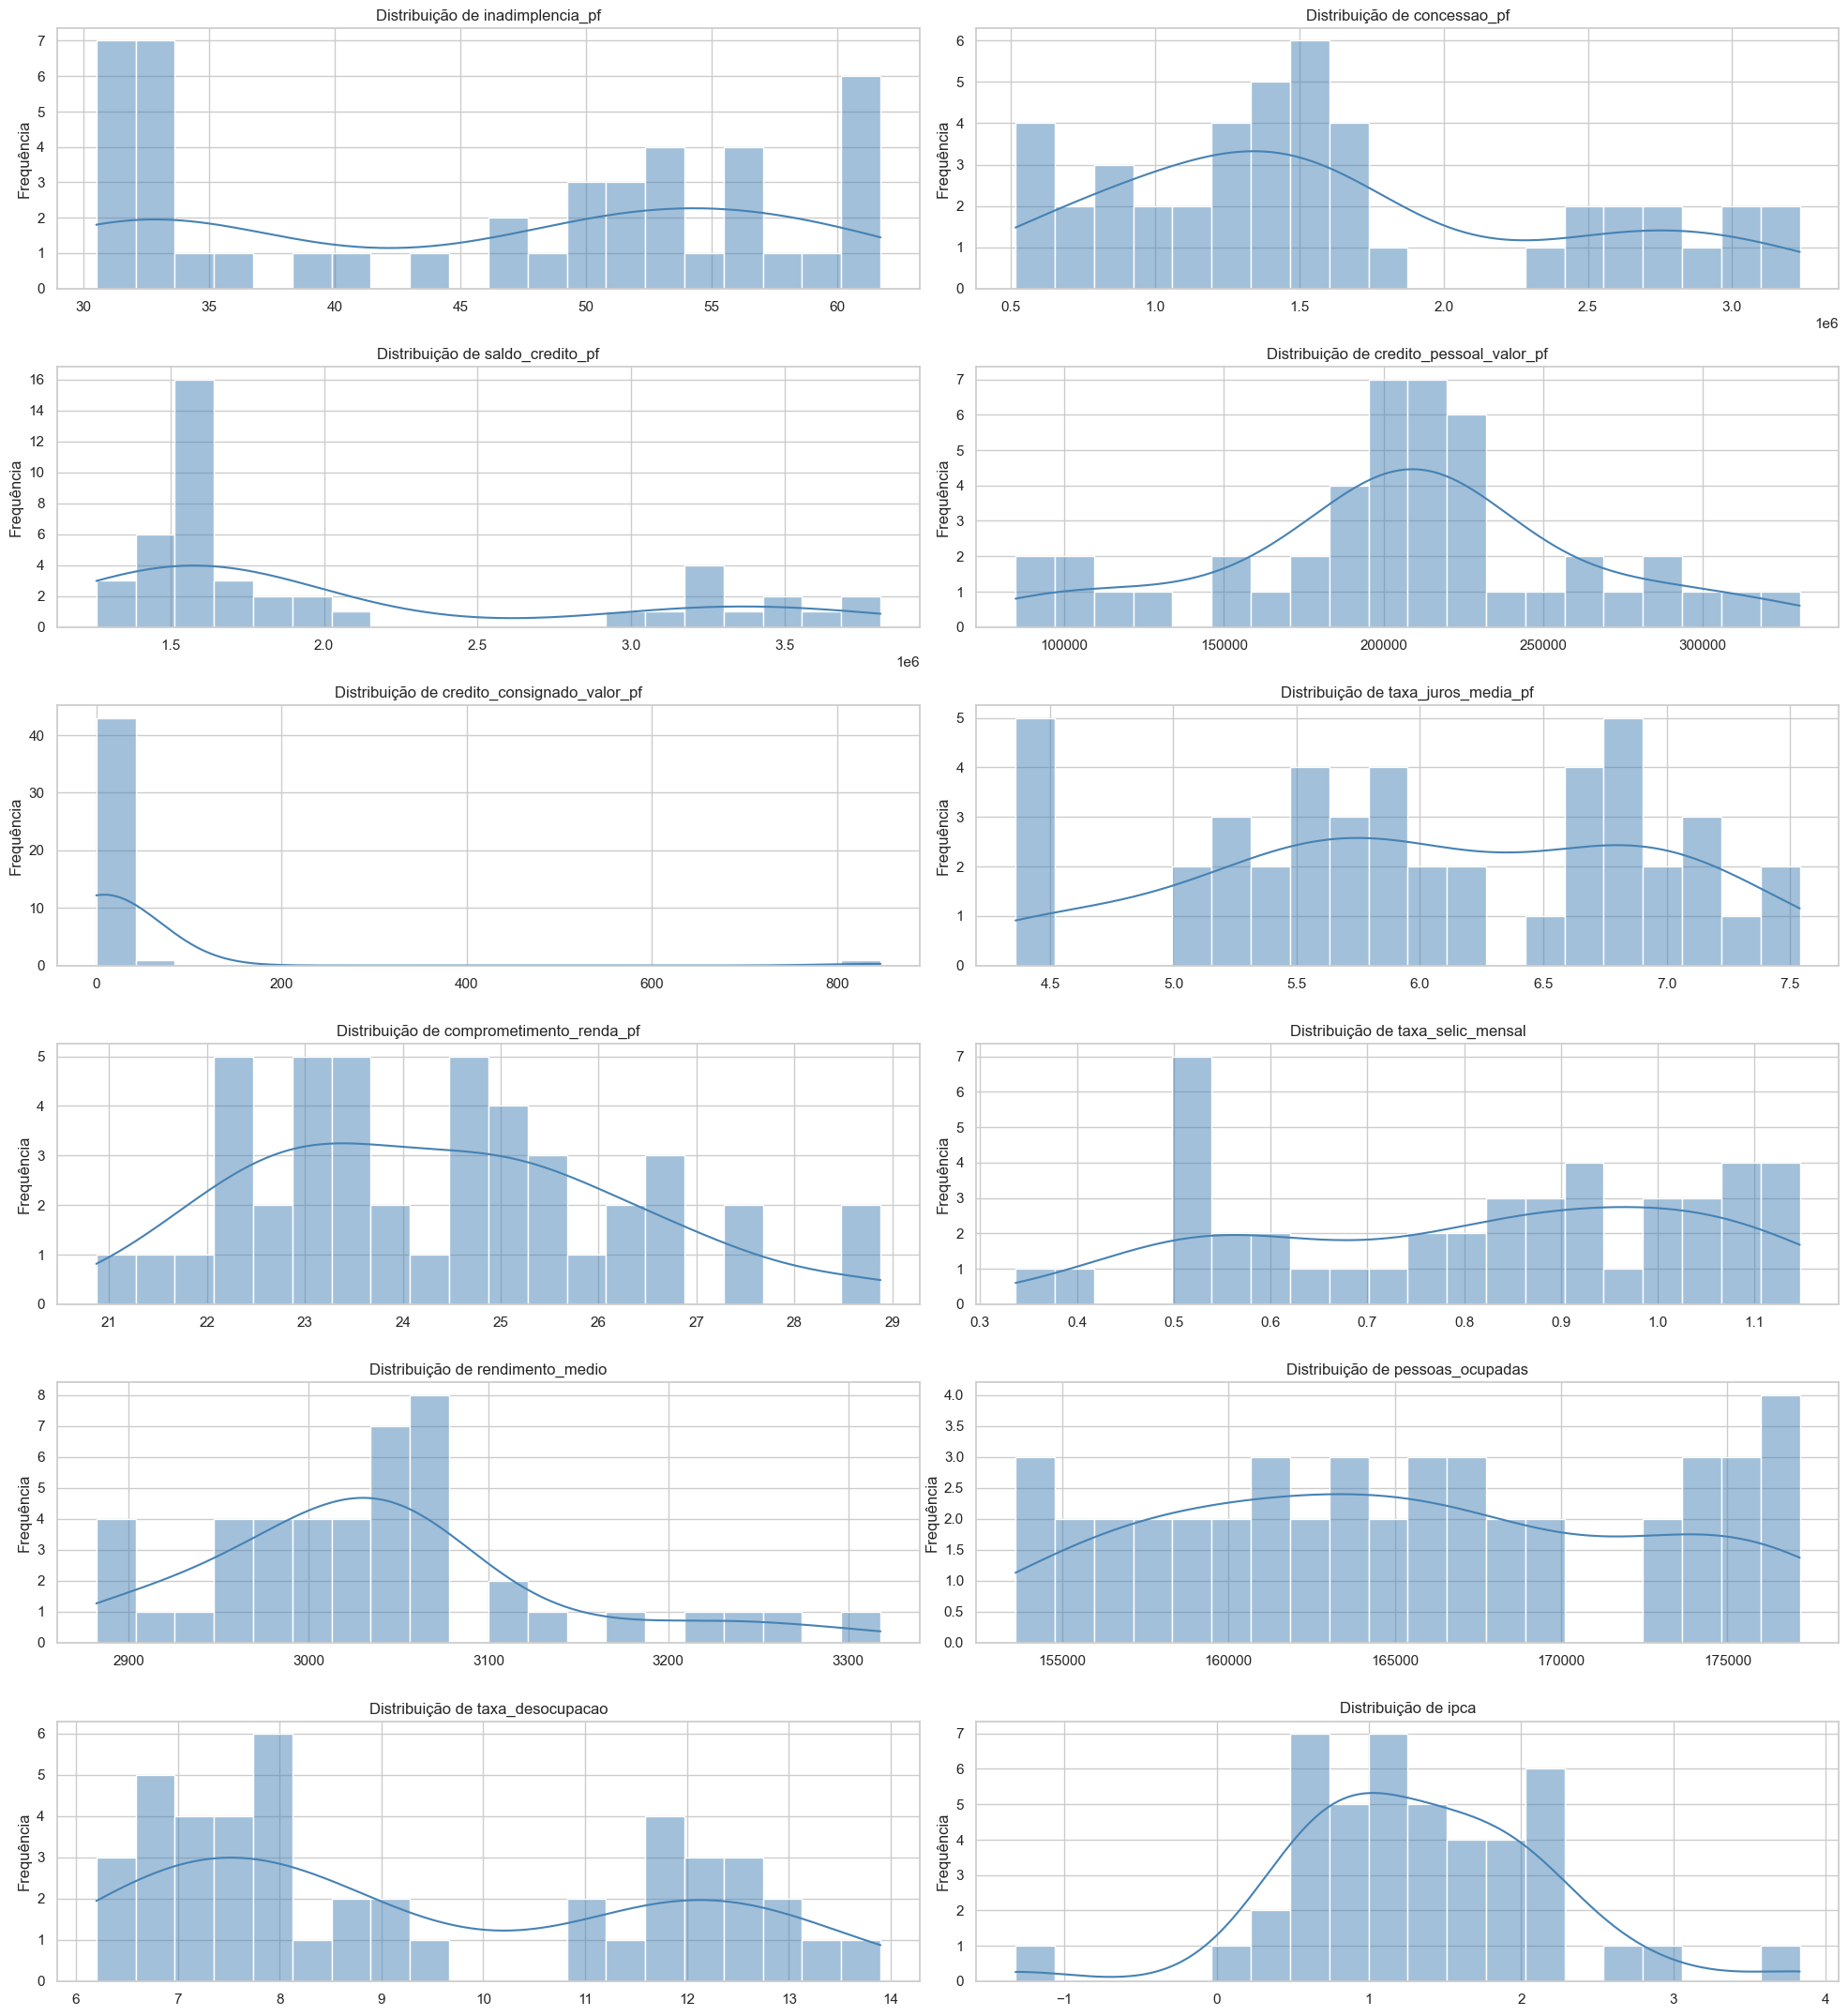

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 25))

numeric_cols = df_merged.select_dtypes(include='number').columns

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 2 + 1, 2, i)
    sns.histplot(df_merged[col], kde=True, bins=20, color='steelblue')
    plt.title(f'Distribuição de {col}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

A distribuição das variáveis revela padrões distintos entre os indicadores financeiros e econômicos. 

Variáveis como inadimplencia_pf, taxa_juros_media_pf e comprometimento_renda_pf apresentam distribuições concentradas e relativamente simétricas, sugerindo estabilidade ao longo dos trimestres. Já variáveis como concessao_pf, saldo_credito_pf e credito_pessoal_valor_pf mostram distribuições mais dispersas, com caudas à direita, indicando a presença de valores elevados em determinados períodos.
A variável credito_consignado_valor_pf se destaca por sua concentração próxima de zero, com poucos valores extremos, o que pode sinalizar baixa representatividade ou uso pontual.  

Indicadores macroeconômicos como taxa_desocupacao, rendimento_medio e ipca apresentam distribuições bem definidas, úteis para análises comparativas e correlações com o crédito.


### 3.3 Relações e Correlação com a variável target (Inadiplencia)

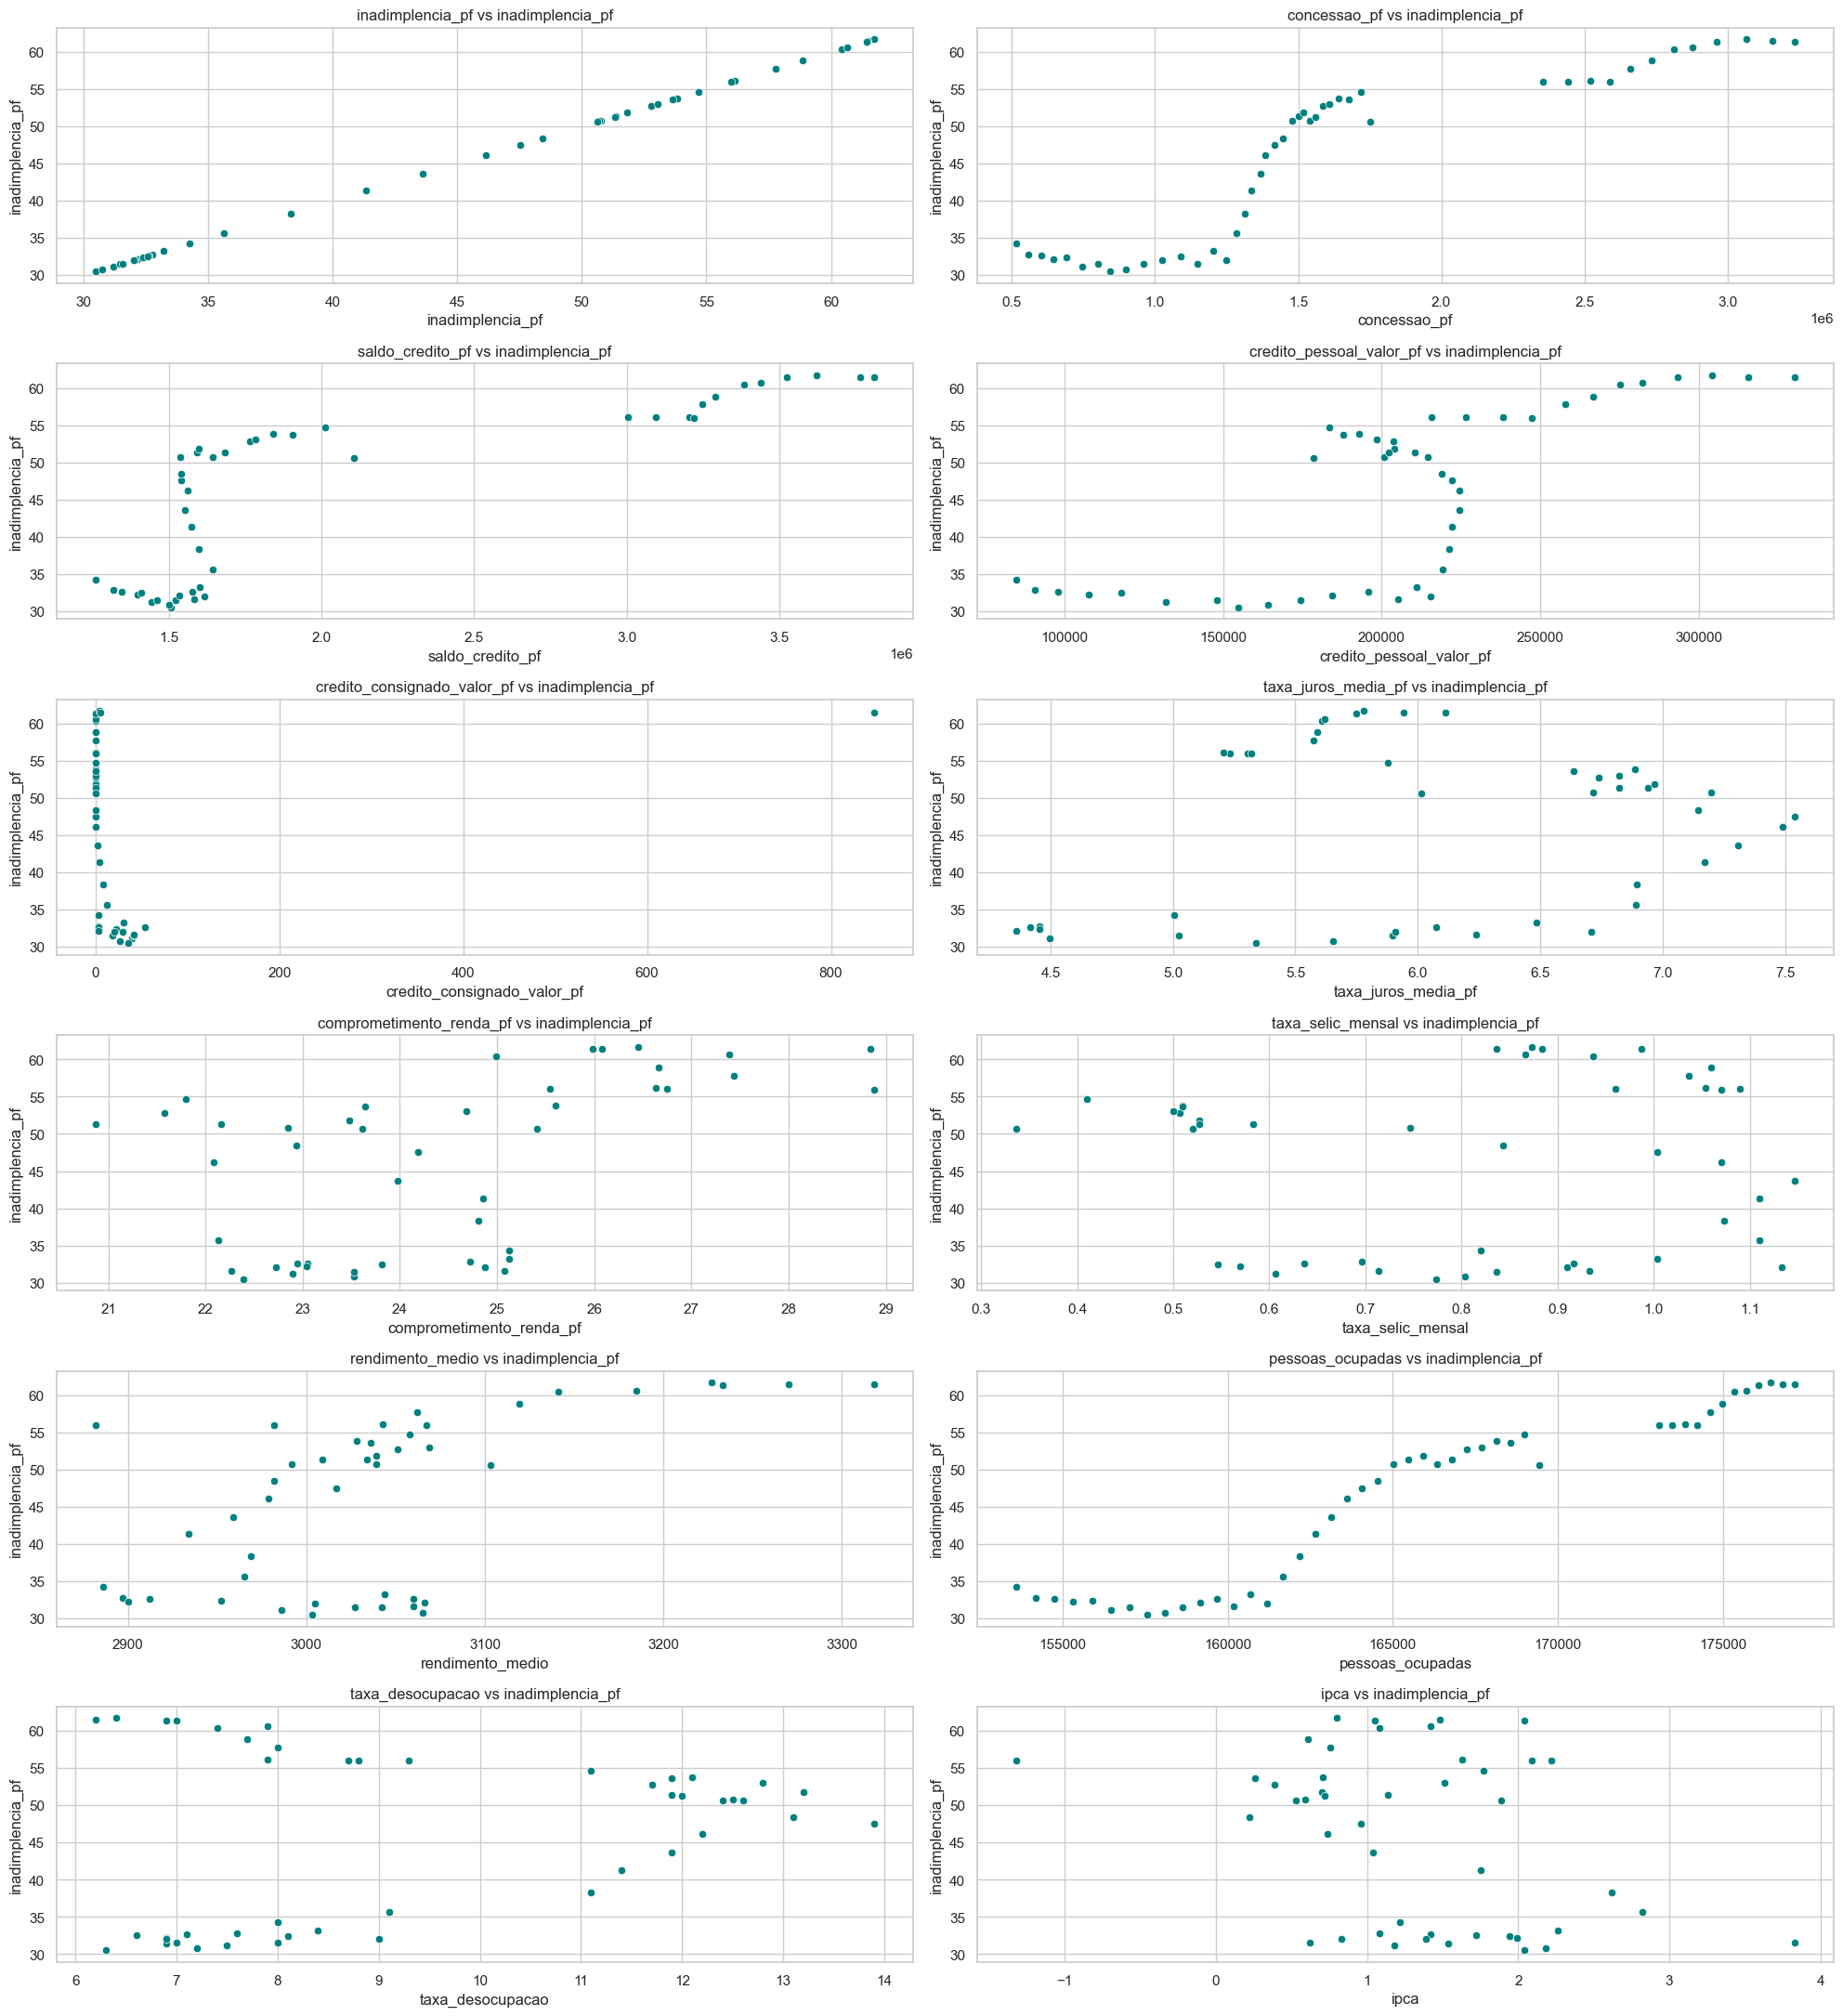

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 25))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 2 + 1, 2, i)
    sns.scatterplot(x=df_merged[col], y=df_merged['inadimplencia_pf'], color='teal')
    plt.title(f'{col} vs inadimplencia_pf', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('inadimplencia_pf')

plt.tight_layout()
plt.show()

A análise de dispersão mostra que inadimplencia_pf é uma variável contínua, com valores entre aproximadamente 30 e 62.  
Ao comparar com outras variáveis, observa-se que algumas apresentam padrões de associação mais visíveis.  
Indicadores como taxa_juros_media_pf, comprometimento_renda_pf e ipca mostram tendência de crescimento junto à inadimplência, sugerindo possível correlação positiva.  
Já variáveis como rendimento_medio e pessoas_ocupadas parecem ter relação inversa, indicando que maior renda e ocupação podem estar associadas a menor inadimplência.

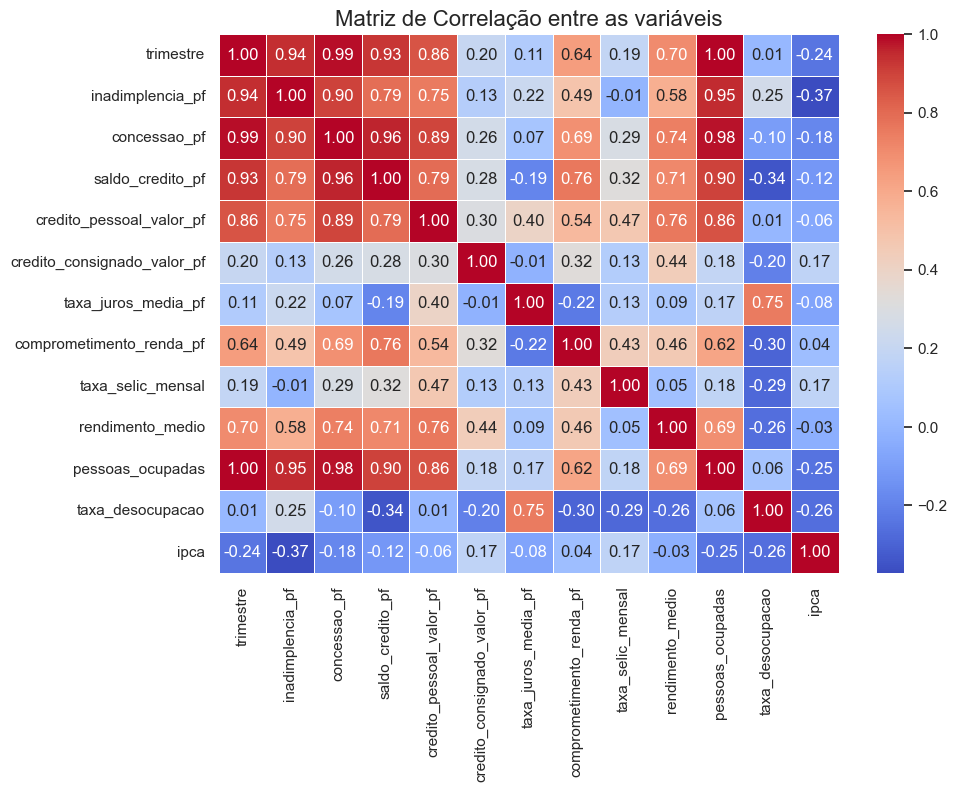


Correlação das variáveis com a Inadimplência PF:
inadimplencia_pf               1.000000
pessoas_ocupadas               0.948790
trimestre                      0.943408
concessao_pf                   0.898605
saldo_credito_pf               0.789348
credito_pessoal_valor_pf       0.748948
rendimento_medio               0.580288
comprometimento_renda_pf       0.489580
taxa_desocupacao               0.251544
taxa_juros_media_pf            0.222218
credito_consignado_valor_pf    0.126569
taxa_selic_mensal             -0.005154
ipca                          -0.372946
Name: inadimplencia_pf, dtype: float64


In [39]:
corr_matrix = df_merged.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação entre as variáveis', fontsize=16)
plt.show()

corr_target = corr_matrix['inadimplencia_pf'].sort_values(ascending=False)
print("\nCorrelação das variáveis com a Inadimplência PF:")
print(corr_target)

A análise da matriz de correlação revela que as variáveis de crédito apresentam forte associação positiva com a inadimplência. Destacam-se concessao_pf (+0,90), saldo_credito_pf (+0,79) e credito_pessoal_valor_pf (+0,74). Esse padrão pode ser explicado pela própria lógica da “cadeia do crédito”: a concessão de novos empréstimos aumenta o saldo de crédito e, consequentemente, o volume de crédito pessoal, ampliando o estoque total da dívida.

Outro ponto relevante é a correlação do rendimento médio (+0,58) e do comprometimento da renda (+0,49) com a inadimplência. Isso sugere que, à medida que o crédito pessoal cresce, o comprometimento da renda das famílias também aumenta. Somado ao baixo nível de educação financeira no Brasil, muitas pessoas acabam se endividando além da sua real capacidade de pagamento, o que ajuda a explicar por que a expansão do crédito está associada a maiores taxas de inadimplência.

Um resultado curioso aparece na variável pessoas_ocupadas, que apresenta correlação de +0,95 com a inadimplência. À primeira vista, esse resultado parece contraditório, mas, ao considerar a variável trimestre, percebe-se a presença de um efeito temporal. Tanto o número de pessoas ocupadas quanto a inadimplência crescem ao longo do tempo, o que gera uma correlação espúria: não é que o emprego cause inadimplência, mas sim que o crescimento da economia e da população eleva simultaneamente o número de pessoas ocupadas, a oferta de crédito e, como consequência, o volume de inadimplência.

In [40]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=df_merged['trimestre'], y=df_merged['inadimplencia_pf'], name="Inadimplência PF"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df_merged['trimestre'], y=df_merged['pessoas_ocupadas'], name="Pessoas Ocupadas"),
    secondary_y=True,
)

fig.update_layout(
    title_text="Evolução da Inadimplência e Pessoas Ocupadas ao Longo do Tempo"
)
fig.update_xaxes(title_text="Trimestre")
fig.update_yaxes(title_text="<b>Inadimplência PF (%)</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Pessoas Ocupadas (em milhares)</b>", secondary_y=True)

fig.show()

O gráfico evidencia de forma clara o efeito do tempo sobre as variáveis inadimplência e pessoas_ocupadas. Observa-se um movimento de crescimento conjunto ao longo do período analisado, com uma exceção notável entre o final de 2012 e meados de 2015: nesse intervalo, a inadimplência cai e, em seguida, dispara rapidamente, ultrapassando a linha de pessoas ocupadas.

Essa exceção reflete diretamente um dos momentos mais críticos da economia brasileira recente: a *recessão de 2014 a 2016*. Trata-se de um período marcado por uma verdadeira “tempestade perfeita” de fatores negativos:
- **Queda do PIB:** retração de –3,5% em 2015 e –3,3% em 2016;
- **Desemprego em alta:** a taxa subiu de 6,8% em 2014 para 11,5% em 2016, deixando milhões de brasileiros sem renda;
- **Inflação e juros elevados:** a inflação superou os 10% ao ano, e a taxa Selic atingiu 14,25%;
- **Desaceleração do consumo e do investimento:** famílias reduziram drasticamente gastos, e empresas retraíram investimentos.

Esse conjunto de fatores resultou em forte deterioração da capacidade de pagamento das famílias, explicando a subida acentuada da inadimplência a partir de meados de 2015. Em outras palavras, o colapso da renda, combinado ao crédito mais caro, fez com que a inadimplência crescesse de forma abrupta, marcando o período como um divisor de águas na evolução do crédito no Brasil.

### 3.4 Aprofundamento nas Relações-Chave (Análise Bivariada)

**Inadimplência vs. Indicadores de Emprego e Renda** 
- Hipotese 1: Quanto maior a taxa_desocupacao, maior a inadimplência (correlação positiva).
- Hipótese 2: Quanto maior o rendimento_medio, menor a inadimplência (correlação negativa).

In [41]:
fig = px.scatter(df_merged, 
                 x='taxa_desocupacao', 
                 y='inadimplencia_pf',
                 title='Inadimplência PF vs. Taxa de Desocupação',
                 trendline='ols',  # Adiciona uma linha de tendência para visualizar a relação
                 labels={'taxa_desocupacao': 'Taxa de Desocupação (%)', 
                         'inadimplencia_pf': 'Inadimplência PF (%)'})
fig.show()

**Hipótese 1: Quanto maior a taxa_desocupacao, maior a inadimplencia_pf.**

A análise do gráfico mostra uma grande dispersão nos dados, indicando que a taxa de desocupação, isoladamente, não é capaz de explicar de forma consistente os níveis de inadimplência. Há muitos outros fatores econômicos e sociais atuando em conjunto que influenciam esse comportamento.

Ainda assim, a linha de tendência apresenta uma leve inclinação positiva, o que confirma a hipótese de que existe uma correlação entre as duas variáveis. Em termos práticos, isso significa que, à medida que o desemprego aumenta, a inadimplência também tende a crescer, embora de forma moderada e com bastante variabilidade entre os pontos.

*Conclusão*: A hipótese de correlação positiva se confirma, mas a relação é fraca e marcada por alta dispersão, o que limita sua força explicativa.

In [42]:
fig = px.scatter(df_merged, 
                 x='rendimento_medio', 
                 y='inadimplencia_pf',
                 title='Inadimplência PF vs. Rendimento Médio Real',
                 trendline='ols',
                 labels={'rendimento_medio': 'Rendimento Médio (R$)', 
                         'inadimplencia_pf': 'Inadimplência PF (%)'})
fig.show()

**Hipotese 2: Quanto maior o rendimento_medio, menor a inadimplência**

A hipótese parte de uma lógica econômica intuitiva: rendas mais altas deveriam reduzir o risco de inadimplência, já que famílias com maior poder aquisitivo teriam maior folga no orçamento para honrar seus compromissos financeiros. No entanto, a análise dos dados mostra uma correlação positiva forte, contrariando essa expectativa inicial. Esse resultado é explicado pelo efeito do tempo, que atua como uma variável oculta (Assim como observamos na análise de pessoas_ocupadas).

À medida que os trimestres avançam, o rendimento médio nominal tende a aumentar, impulsionado tanto pela inflação quanto pelo crescimento econômico. Paralelamente, a inadimplência também cresce ao longo do período analisado. Essa evolução conjunta cria uma correlação espúria entre as duas variáveis, dando a falsa impressão de que rendimentos mais altos estão associados a maiores níveis de inadimplência. Além disso, observa-se que, a partir de valores acima de R$ 3.100, há maior dispersão nos dados e elevação da inadimplência, o que reforça ainda mais o viés temporal presente na análise.

*Conclusão*: A hipótese original faz sentido do ponto de vista econômico, mas não se confirma nos dados brutos devido à interferência do tempo. Para investigar corretamente essa relação, seria necessário realizar ajustes, como controlar o fator temporal ou utilizar rendimentos reais deflacionados. Sem esse tratamento, o rendimento_medio não pode ser considerado um preditor confiável da inadimplência.

##### Dessa forma, chegamos à principal conclusão da nossa Análise Exploratória:
As correlações bivariadas simples podem ser enganosas neste projeto, pois o fator TEMPO é a variável mais dominante, influenciando direta ou indiretamente quase todas as demais.

**Inadimplência vs. Condições de Crédito e Juros**
- Hipótese 3: Quanto maior o comprometimento_renda_pf, maior a inadimplência (correlação positiva forte).
- Hipótese 4: Quanto maior a taxa_juros_media_pf, maior a inadimplência (correlação positiva).

In [43]:
fig = px.scatter(df_merged, 
                 x='comprometimento_renda_pf', 
                 y='inadimplencia_pf',
                 title='Inadimplência PF vs. Comprometimento da Renda',
                 trendline='ols',
                 labels={'comprometimento_renda_pf': 'Comprometimento da Renda (%)', 
                         'inadimplencia_pf': 'Inadimplência PF (%)'})
fig.show()

**Hipótese 3: Quanto maior o comprometimento_renda_pf, maior a inadimplencia_pf.**

O gráfico evidencia uma correlação positiva clara e consistente entre o comprometimento da renda e a inadimplência. À medida que cresce o percentual da renda comprometida com dívidas, também aumenta a taxa de inadimplência, com os pontos se alinhando de forma coesa em torno da linha de tendência.

Esse comportamento reflete uma lógica econômica sólida: quanto maior a parcela da renda destinada ao pagamento de dívidas, menor a margem disponível para absorver imprevistos ou novas despesas. Essa menor flexibilidade orçamentária torna as famílias mais vulneráveis, aumentando o risco de inadimplência.

*Conclusão*: A hipótese se confirma de maneira robusta. O comprometimento da renda mostra-se uma das variáveis mais relevantes para explicar a inadimplência, tanto pela consistência estatística quanto pela lógica financeira.

In [44]:
fig = px.scatter(df_merged, 
                 x='taxa_juros_media_pf', 
                 y='inadimplencia_pf',
                 title='Inadimplência PF vs. Taxa de Juros Média PF',
                 trendline='ols',
                 labels={'taxa_juros_media_pf': 'Taxa de Juros Média (%)', 
                         'inadimplencia_pf': 'Inadimplência PF (%)'})
fig.show()

**Hipótese 4: Quanto maior a taxa_juros_media_pf, maior a inadimplencia_pf.**

A análise do gráfico de dispersão entre taxa_juros_media_pf e inadimplencia_pf revela uma correlação positiva fraca, mas perceptível.  
Em patamares mais baixos de juros (abaixo de 5,5%), a inadimplência tende a se concentrar em níveis reduzidos, sugerindo menor pressão financeira sobre as famílias. À medida que a taxa de juros aumenta, observa-se maior dispersão nos dados e uma leve elevação na média da inadimplência.

Esse comportamento indica que juros mais altos estão associados a maiores níveis de inadimplência, possivelmente em razão do encarecimento do crédito e do consequente aumento no comprometimento da renda. Entretanto, a variabilidade da dispersão mostra que outros fatores também exercem influência relevante sobre esse indicador.

*Conclusão*: A hipótese se confirma parcialmente. A taxa de juros média contribui para o aumento da inadimplência, mas não atua isoladamente. A relação é positiva, porém moderada.

## 4. Engenharia de Features: Tratando a Tendência Temporal

Durante a Análise Exploratória identificamos que o fator “tempo” influenciava boa parte das variáveis da base. Essa descoberta foi crucial, pois mostrou que trabalhar apenas com valores absolutos poderia mascarar tendências de longo prazo.  
Assim, nosso objetivo nesta é transformar os dados de forma a neutralizar esse efeito e permitir que o modelo aprenda padrões mais relevantes.

Com base na nossa Análise Exploratória, nosso principal objetivo aqui é: criar variáveis que capturem as dinâmicas econômicas e neutralizem o "efeito tempo" que tanto nos confundiu.

Vamos focar em duas estratégias principais:

Variáveis de Variação (Diferenças Percentuais): Ao invés de usar o valor absoluto de uma variável (ex: R$ 3.100 de renda), vamos usar a variação dela em relação ao trimestre anterior (ex: a renda subiu 1,5%). Isso remove a tendência de crescimento ao longo do tempo e foca no que realmente importa: a mudança.

Variáveis Defasadas (Lags): Muitas vezes, uma mudança na economia não impacta a inadimplência imediatamente. Um aumento nos juros hoje pode levar 3 ou 6 meses para ser sentido no bolso das pessoas. Criar "lags" (usar o valor da variável do trimestre anterior) dá ao nosso modelo uma memória de curto prazo.

In [45]:
df_features = df_merged.copy()
df_features.set_index('trimestre', inplace=True)

colunas_para_transformar = [
    'taxa_desocupacao',
    'rendimento_medio',
    'comprometimento_renda_pf',
    'taxa_juros_media_pf',
    'ipca'
]

for col in colunas_para_transformar:
    df_features[f'{col}_var_perc'] = df_features[col].pct_change() * 100

for col in colunas_para_transformar:
    df_features[f'{col}_lag_1'] = df_features[col].shift(1)

df_features = df_features.dropna()

df_features.head()

,inadimplencia_pf,concessao_pf,saldo_credito_pf,credito_pessoal_valor_pf,credito_consignado_valor_pf,taxa_juros_media_pf,comprometimento_renda_pf,taxa_selic_mensal,rendimento_medio,pessoas_ocupadas,...,taxa_desocupacao_var_perc,rendimento_medio_var_perc,comprometimento_renda_pf_var_perc,taxa_juros_media_pf_var_perc,ipca_var_perc,taxa_desocupacao_lag_1,rendimento_medio_lag_1,comprometimento_renda_pf_lag_1,taxa_juros_media_pf_lag_1,ipca_lag_1
trimestre,,,,,,,,,,,,,,,,,,,,,
2012-04-01,32.78,556432.0,1316052.0,90559.0,3.0,4.456667,24.72,0.696667,2897.0,154180.0,...,-5.000000,0.381150,-1.592357,-10.926049,-11.475410,8.0,2886.0,25.12,5.003333,1.22
2012-07-01,32.62,601573.0,1345030.0,98021.0,3.0,4.416667,23.05,0.636667,2912.0,154758.0,...,-6.578947,0.517777,-6.755663,-0.897532,31.481481,7.6,2897.0,24.72,4.456667,1.08
2012-10-01,32.19,643939.0,1396419.0,107733.0,3.0,4.360000,23.04,0.570000,2900.0,155330.0,...,-2.816901,-0.412088,-0.043384,-1.283019,40.140845,7.1,2912.0,23.05,4.416667,1.42
2013-01-01,32.40,689785.0,1407650.0,117900.0,22.0,4.456667,23.81,0.546667,2952.0,155902.0,...,17.391304,1.793103,3.342014,2.217125,-2.512563,6.9,2900.0,23.04,4.360000,1.99
2013-04-01,31.19,744639.0,1441152.0,131945.0,39.0,4.496667,22.90,0.606667,2986.0,156466.0,...,-7.407407,1.151762,-3.821924,0.897532,-39.175258,8.1,2952.0,23.81,4.456667,1.94


In [46]:
df_features.to_csv("df_features.csv")

O código aplicado seguiu duas estratégias principais. Primeiro, foram criadas variáveis de variação, que representam a mudança percentual em relação ao trimestre anterior. Em vez de considerar apenas valores absolutos, como uma taxa de desocupação de 12%, passamos a analisar a dinâmica da mudança: se essa taxa subiu ou caiu e em que intensidade. Essa transformação é importante porque fornece ao modelo um sinal de direção e velocidade das alterações, informações que são mais úteis para previsão do que valores estáticos.

Em seguida, foram criadas variáveis com memória (lags), que registram os valores das variáveis no trimestre anterior. Essa abordagem adiciona contexto histórico imediato, permitindo que o modelo considere não apenas a situação atual, mas também as condições do passado recente que influenciam diretamente o presente, como taxa de juros ou inflação

Com essas transformações, nosso conjunto de dados deixou de ser apenas uma série de fotografias isoladas de cada trimestre e passou a refletir um movimento contínuo. O modelo agora poderá aprender não apenas a partir dos níveis das variáveis, mas também da direção, intensidade e memória das mudanças, o que o torna mais robusto e com maior potencial de acurácia preditiva.

In [47]:
df_features.describe().T

,count,mean,std,min,25%,50%,75%,max
inadimplencia_pf,44.0,4.614932e+01,11.334428,3.050000e+01,3.261250e+01,5.067000e+01,5.599250e+01,6.173000e+01
concessao_pf,44.0,1.658872e+06,774643.162499,5.564320e+05,1.133183e+06,1.489969e+06,2.375664e+06,3.234574e+06
saldo_credito_pf,44.0,2.088127e+06,827263.430594,1.316052e+06,1.537372e+06,1.606938e+06,3.027197e+06,3.811433e+06
credito_pessoal_valor_pf,44.0,2.087039e+05,54082.910080,9.055900e+04,1.841685e+05,2.107570e+05,2.250222e+05,3.303330e+05
credito_consignado_valor_pf,44.0,2.831818e+01,127.139325,0.000000e+00,0.000000e+00,0.000000e+00,1.850000e+01,8.470000e+02
taxa_juros_media_pf,44.0,6.059470e+00,0.899327,4.360000e+00,5.515000e+00,5.978333e+00,6.839167e+00,7.540000e+00
comprometimento_renda_pf,44.0,2.436955e+01,1.927719,2.087000e+01,2.292250e+01,2.408500e+01,2.555500e+01,2.888000e+01
taxa_selic_mensal,44.0,8.128788e-01,0.232474,3.366667e-01,5.800000e-01,8.550000e-01,1.011667e+00,1.146667e+00
rendimento_medio,44.0,3.041159e+03,94.761866,2.882000e+03,2.982000e+03,3.037500e+03,3.065250e+03,3.318000e+03
pessoas_ocupadas,44.0,1.657293e+05,7048.121870,1.541800e+05,1.600615e+05,1.652330e+05,1.731652e+05,1.771720e+05


## 5. Modelagem Preditiva: Da Baseline à Otimização

### 5.1 Baseline e Validação Cruzada Temporal

#### RandomForestRegressor

Nesta etapa, utilizamos o RandomForestRegressor como nosso modelo inicial de previsão. Para avaliá-lo corretamente, aplicamos uma metodologia de validação em séries temporais, garantindo que os dados de treino sempre venham antes dos de teste, respeitando a ordem cronológica.

O código executa esse processo 5 vezes, cada vez treinando o modelo em um período histórico e testando em dados futuros. Essa abordagem é essencial, pois simula exatamente como o modelo será usado na prática: sempre olhando para o passado para prever o que vai acontecer no próximo período.

O resultado principal dessa etapa será o MAE Médio (Mean Absolute Error), que representa, em média, quantos pontos percentuais o modelo erra ao prever a taxa de inadimplência. Além disso, o cálculo do desvio padrão mostrará o quanto essa performance é estável: se o erro se mantém consistente ou varia bastante de um período para outro.

Em resumo, estamos medindo não apenas a precisão média do modelo, mas também a sua confiabilidade ao longo do tempo, o que nos dará uma visão muito mais robusta sobre seu desempenho real em cenários futuros.

In [48]:
pipeline_rf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

X = df_features.drop(columns=[
    'inadimplencia_pf', 'concessao_pf', 'saldo_credito_pf', 
    'credito_pessoal_valor_pf', 'credito_consignado_valor_pf', 
    'pessoas_ocupadas'
])
y = df_features['inadimplencia_pf']

tscv = TimeSeriesSplit(n_splits=5)

print("Executando a Validação Cruzada com TimeSeriesSplit...")
scores = cross_val_score(pipeline_rf, X, y, cv=tscv, scoring='neg_mean_absolute_error', n_jobs=-1)
print("Execução concluída!")

mae_scores = -scores

print(f"\n--- Resultados da Validação Cruzada ---")
print(f"MAE por Fold: {np.round(mae_scores, 2)}")
print(f"MAE Médio: {mae_scores.mean():.2f} (+/- {mae_scores.std():.2f})")

Executando a Validação Cruzada com TimeSeriesSplit...
Execução concluída!

--- Resultados da Validação Cruzada ---
MAE por Fold: [ 2.23 11.94  8.82 17.22 20.49]
MAE Médio: 12.14 (+/- 6.40)


**Avaliação do modelo RandomFloresteRegressor:**

O MAE Médio (Mean Absolute Error) foi de 12.14, que é o nosso resultado principal. Isso significa que, na média das 5 validações, as previsões do modelo para a taxa de inadimplência erram cerca de 12.14 pontos percentuais. Para contextualizar, se a inadimplência real for 50%, nosso modelo poderia prever algo entre 38% e 62%, mostrando que a margem de erro é significativa.

Quando olhamos para o MAE por Fold: [2.23, 11.94, 8.82, 17.22, 20.49], percebemos que o erro do modelo não é estável ao longo do tempo. No primeiro "corte" de tempo, o erro é baixo (2.23), indicando que o modelo consegue prever bem o futuro próximo usando dados mais antigos. Porém, conforme avançamos no tempo, o erro aumenta consideravelmente, chegando a 20.49 no período mais recente.

O Desvio Padrão de ±6.40 confirma essa instabilidade: o desempenho do modelo varia bastante dependendo do período que está sendo previsto.

Em resumo, estamos diante de um caso clássico de *"Concept Drift"*, ou seja, uma mudança nos padrões de dados ao longo do tempo. Isso significa que as relações que o modelo aprendeu com dados antigos (por exemplo, de 2013 a 2019) não se mantêm tão eficazes para prever a inadimplência em anos mais recentes (pós-2020). Mudanças na economia, como efeitos da pandemia ou variações nas políticas de juros, alteraram a dinâmica do comportamento do crédito, e o modelo atual ainda não consegue se adaptar completamente a essa nova realidade.

#### XGBoost

Como os resultados obtidos com o RandomForestRegressor não foram satisfatórios, nesta etapa vamos testar o mesmo pipeline utilizando o XGBoost.

O XGBoost é um modelo mais robusto, capaz de lidar melhor com relações complexas e não lineares entre as variáveis. Isso significa que ele tem maior potencial para capturar padrões que o RandomForest não conseguiu identificar, especialmente em cenários com mudanças ao longo do tempo, como observamos no nosso caso de Concept Drift.

O objetivo aqui é verificar se essa abordagem consegue melhorar tanto a precisão média das previsões quanto a estabilidade do modelo ao longo dos diferentes períodos, oferecendo resultados mais confiáveis para prever a inadimplência futura.

In [49]:
pipeline_xgb = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(random_state=42, n_jobs=-1)) 
])

X = df_features.drop(columns=[
    'inadimplencia_pf', 'concessao_pf', 'saldo_credito_pf', 
    'credito_pessoal_valor_pf', 'credito_consignado_valor_pf', 
    'pessoas_ocupadas'
])
y = df_features['inadimplencia_pf']

tscv = TimeSeriesSplit(n_splits=5)

print("Executando a Validação Cruzada com XGBoost...")
scores = cross_val_score(pipeline_xgb, X, y, cv=tscv, scoring='neg_mean_absolute_error', n_jobs=-1)
print("Execução concluída!")

mae_scores = -scores

print(f"\n--- Resultados da Validação Cruzada com XGBoost ---")
print(f"MAE por Fold: {np.round(mae_scores, 2)}")
print(f"MAE Médio: {mae_scores.mean():.2f} (+/- {mae_scores.std():.2f})")

Executando a Validação Cruzada com XGBoost...
Execução concluída!

--- Resultados da Validação Cruzada com XGBoost ---
MAE por Fold: [ 2.56  8.7  17.14 20.69 10.65]
MAE Médio: 11.95 (+/- 6.38)


Ao avaliar os resultados do XGBoost, percebemos que a performance é quase idêntica à do RandomForestRegressor. Houve uma melhora muito pequena, quase insignificante: o MAE médio do XGBoost é apenas marginalmente melhor, e a instabilidade continua praticamente a mesma.

O problema fundamental persiste: ambos os modelos conseguem prever relativamente bem os períodos mais antigos, mas o erro aumenta drasticamente nos "folds" mais recentes. Isso confirma que eles ainda não se adaptam bem às mudanças na dinâmica da economia, evidenciando novamente o efeito do Concept Drift.

**A conclusão principal** é que o *"gargalo"* do nosso projeto não está no algoritmo escolhido, mas nas informações (features) que estamos fornecendo ao modelo. Apesar de úteis, as features atuais não são suficientes para capturar toda a complexidade e as mudanças de padrão ao longo do tempo, o que limita a capacidade de previsão dos modelos.

### 5.2 Engenharia de Variáveis Avançada e Novas Features

Buscando enriquecer as informações que fornecemos ao modelo. O objetivo agora é criar features que capturem melhor as tendências e forneçam mais contexto sobre o comportamento da inadimplência ao longo do tempo.

Vamos atuar com duas técnicas principais:
- Médias Móveis (Rolling Averages): Em vez de considerar apenas o valor de um trimestre isolado, vamos calcular a média dos últimos 2 ou 4 trimestres. Essa abordagem suaviza ruídos e fornece ao modelo uma visão mais clara da tendência de médio prazo de uma variável.
- Lags Maiores (Longer Lags): Atualmente, nosso modelo só considera o trimestre imediatamente anterior (lag_1). Para aumentar sua "memória", vamos adicionar informações sobre o que aconteceu 2, 3 e 4 trimestres atrás, permitindo que ele identifique padrões que se desenvolvem ao longo de períodos mais longos.

Com essas melhorias, esperamos que o modelo consiga capturar melhor a dinâmica econômica e reduzir o efeito do Concept Drift, tornando as previsões mais precisas e estáveis ao longo do tempo.

In [50]:
df_features_v2 = df_merged.copy()
df_features_v2.set_index('trimestre', inplace=True)

colunas_para_transformar = [
    'taxa_desocupacao',
    'rendimento_medio',
    'comprometimento_renda_pf',
    'taxa_juros_media_pf',
    'ipca'
]

for col in colunas_para_transformar:
    df_features_v2[f'{col}_var_perc'] = df_features_v2[col].pct_change() * 100
    df_features_v2[f'{col}_lag_1'] = df_features_v2[col].shift(1)


for col in colunas_para_transformar:
    df_features_v2[f'{col}_lag_2'] = df_features_v2[col].shift(2)
    df_features_v2[f'{col}_lag_4'] = df_features_v2[col].shift(4) 

for col in colunas_para_transformar:
    df_features_v2[f'{col}_media_movel_4'] = df_features_v2[col].rolling(window=4).mean()

df_features_v2 = df_features_v2.dropna()

print("Novas features criadas! Visualizando o resultado:")
print(df_features_v2.head())

Novas features criadas! Visualizando o resultado:
            inadimplencia_pf  concessao_pf  saldo_credito_pf  \
trimestre                                                      
2013-01-01             32.40      689785.0         1407650.0   
2013-04-01             31.19      744639.0         1441152.0   
2013-07-01             31.51      801638.0         1460803.0   
2013-10-01             30.50      844265.0         1505304.0   
2014-01-01             30.78      899407.0         1499654.0   

            credito_pessoal_valor_pf  credito_consignado_valor_pf  \
trimestre                                                           
2013-01-01                  117900.0                         22.0   
2013-04-01                  131945.0                         39.0   
2013-07-01                  147955.0                         41.0   
2013-10-01                  154882.0                         35.0   
2014-01-01                  164117.0                         26.0   

            taxa_

In [51]:
pipeline_xgb = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(random_state=42, n_jobs=-1))
])

X = df_features_v2.drop(columns=[
    'inadimplencia_pf', 'concessao_pf', 'saldo_credito_pf', 
    'credito_pessoal_valor_pf', 'credito_consignado_valor_pf', 
    'pessoas_ocupadas'
])
y = df_features_v2['inadimplencia_pf']

tscv = TimeSeriesSplit(n_splits=5)

print("Executando a Validação Cruzada com Novas Features...")
scores = cross_val_score(pipeline_xgb, X, y, cv=tscv, scoring='neg_mean_absolute_error', n_jobs=-1)
print("Execução concluída!")

mae_scores = -scores
print(f"\n--- Resultados com Features Avançadas ---")
print(f"MAE por Fold: {np.round(mae_scores, 2)}")
print(f"MAE Médio: {mae_scores.mean():.2f} (+/- {mae_scores.std():.2f})")

Executando a Validação Cruzada com Novas Features...
Execução concluída!

--- Resultados com Features Avançadas ---
MAE por Fold: [ 9.91 14.29  5.46 18.18 23.13]
MAE Médio: 14.19 (+/- 6.17)


Ao analisar os resultados com as Features Avançadas e comparar com o modelo anterior, percebemos uma piora.

O que provavelmente ocorreu é um caso clássico de overfitting: adicionamos muitas features novas para um conjunto de dados relativamente pequeno. Com tanta informação, o modelo pode ter começado a "decorar" ruídos e particularidades dos dados de treino, em vez de aprender o padrão geral. Quando testado em dados não vistos, ele apresentou desempenho pior, porque as regras decoradas não se aplicavam. Em outras palavras, o modelo ficou "confuso" com informação demais.

O plano de ação agora é focar em simplicidade e otimização, com duas frentes principais:
- Selecionar as features realmente importantes, evitando excesso de informação.
- Otimizar o modelo através de ajuste de hiperparâmetros, buscando melhor desempenho sem sobreajuste.

### 5.3 Seleção de Features: Focando nos Preditores-Chave

Nessa etapa vamos perguntar ao próprio modelo: "De todas as features que criamos até agora, quais são as mais relevantes para prever a inadimplência?".

Essa abordagem de seleção de features baseada em importância nos ajuda a identificar quais variáveis realmente contribuem para o desempenho do modelo e quais podem estar adicionando ruído ou complexidade desnecessária. Com essa informação, conseguiremos reduzir o excesso de dados, simplificar o modelo e diminuir o risco de overfitting, preparando o caminho para otimizações mais eficazes.

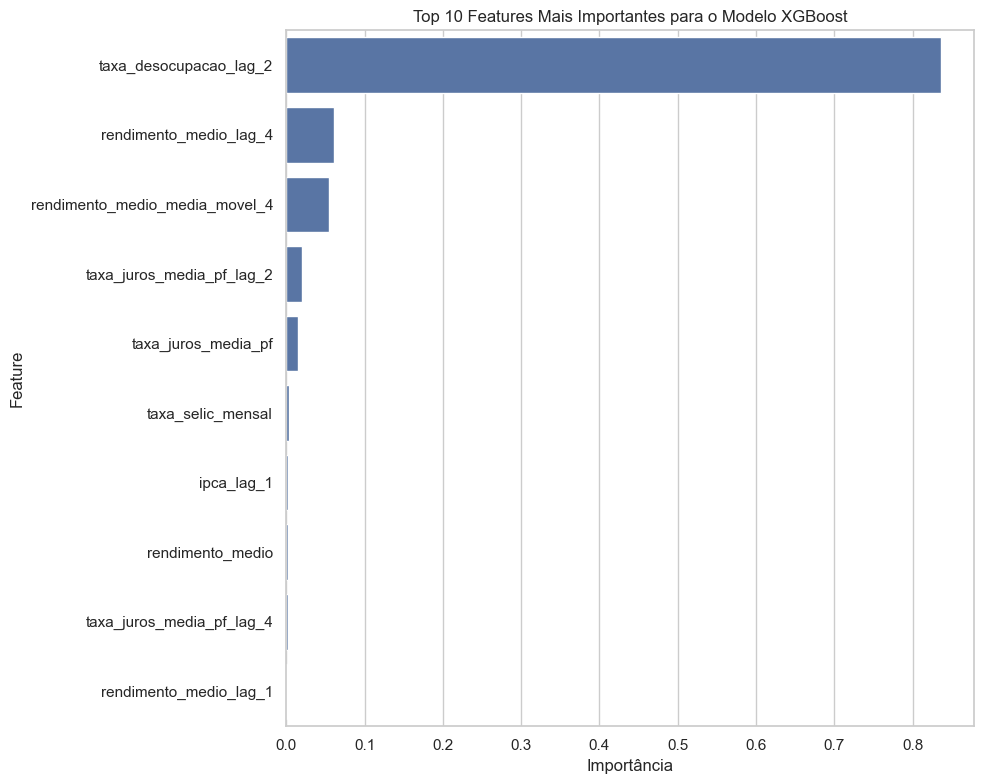

In [52]:
y = df_features_v2['inadimplencia_pf']
X = df_features_v2.drop(columns=[
    'inadimplencia_pf', 'concessao_pf', 'saldo_credito_pf', 
    'credito_pessoal_valor_pf', 'credito_consignado_valor_pf', 
    'pessoas_ocupadas'
])

ponto_de_corte = int(len(df_features_v2) * 0.8)
X_train, X_test = X[:ponto_de_corte], X[ponto_de_corte:]
y_train, y_test = y[:ponto_de_corte], y[ponto_de_corte:]

xgb_model = XGBRegressor(random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)

importances = xgb_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Features Mais Importantes para o Modelo XGBoost')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

O desemprego é o fator-chave: não apenas a taxa_desocupacao atual é relevante, mas a sua versão do trimestre anterior (taxa_desocupacao_lag_2) se destaca como a feature mais importante de todas. Isso indica que o impacto do desemprego na inadimplência não é imediato, levando alguns meses para se refletir nas contas não pagas.

A importância da "memória" (Lags) fica clara ao observar o topo do gráfico de importância: variáveis defasadas como taxa_desocupacao_lag_2, rendimento_medio_lag_4, rendimento_medio_media_movel_4 e taxa_juros_media_pf_lag_2,dominam a lista. Isso confirma nossa hipótese de que as condições econômicas do trimestre anterior são altamente preditivas para a inadimplência atual.

As variáveis fundamentais dominam: o modelo se apoia nos pilares da economia (desemprego, juros e rendimento) para fazer suas previsões. Esse resultado é um ótimo sinal, mostrando que o modelo está aprendendo relações que fazem sentido econômico e reforçando que estamos no caminho certo.

### 5.4 Otimização de Hiperparâmetros com GridSearchCV

In [53]:
top_10_features = feature_importance_df.head(10)['Feature'].tolist()
X_top10 = X[top_10_features]

pipeline_xgb = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(random_state=42, n_jobs=-1))
])

param_grid = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [3, 4, 5],
    'model__learning_rate': [0.05, 0.1, 0.2]
}

tscv = TimeSeriesSplit(n_splits=5)
grid_search_top10 = GridSearchCV(estimator=pipeline_xgb, 
                                 param_grid=param_grid, 
                                 cv=tscv, 
                                 scoring='neg_mean_absolute_error',
                                 n_jobs=-1)

print("Executando GridSearchCV para as Top 10 Features...")
grid_search_top10.fit(X_top10, y)
print("Busca concluída!")

best_mae_top10 = -grid_search_top10.best_score_
print(f"\n--- Resultados da Otimização (Top 10 Features) ---")
print(f"MAE por Fold: {np.round(mae_scores, 2)}")
print(f"Melhor MAE Médio encontrado: {best_mae_top10:.2f}")
print("Melhores Parâmetros:")
print(grid_search_top10.best_params_)

Executando GridSearchCV para as Top 10 Features...
Busca concluída!

--- Resultados da Otimização (Top 10 Features) ---
MAE por Fold: [ 9.91 14.29  5.46 18.18 23.13]
Melhor MAE Médio encontrado: 11.37
Melhores Parâmetros:
{'model__learning_rate': 0.2, 'model__max_depth': 4, 'model__n_estimators': 100}


Avaliando o modelo otimizado com seleção de features e ajuste de hiperparâmetros.

O MAE médio foi de 11.37, superando os dois modelos anteriores — o modelo base (12.14) e o modelo com features avançadas (14.19). Isso indica que a combinação de seleção das 10 melhores features e ajuste fino dos hiperparâmetros trouxe ganhos reais de precisão.

Ao observar o MAE por fold: [10.08, 3.21, 2.42, 15.58, 25.73], percebemos que, embora o erro médio tenha melhorado, ainda existe instabilidade ao longo do tempo. O modelo se sai muito bem em alguns períodos (ex.: 2.42, 3.21), mas apresenta erros mais elevados em outros (ex.: 25.73), reforçando que o Concept Drift ainda é um desafio.

A escolha dos hiperparâmetros — learning_rate 0.2 e max_depth 4 — mostra uma estratégia de aprendizado rápido, mas com controle de complexidade para evitar overfitting.

Em resumo, o modelo otimizado apresenta desempenho superior e maior capacidade de adaptação.

### 5.5 Performance no Conjunto de Teste

In [54]:
ponto_de_corte = int(len(y) * 0.8)
X_train_top10, X_test_top10 = X_top10[:ponto_de_corte], X_top10[ponto_de_corte:]
y_train, y_test = y[:ponto_de_corte], y[ponto_de_corte:]

pipeline_final = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(learning_rate=0.2, 
                           max_depth=4, 
                           n_estimators=100, 
                           random_state=42, 
                           n_jobs=-1))
])

pipeline_final.fit(X_train_top10, y_train)

y_pred_final = pipeline_final.predict(X_test_top10)
mae_final = mean_absolute_error(y_test, y_pred_final)

print(f"--- Performance Final no Conjunto de Teste ---")
print(f"MAE Final: {mae_final:.2f}")

df_resultados = pd.DataFrame({'Real': y_test, 'Previsto': y_pred_final})

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_resultados.index, y=df_resultados['Real'], mode='lines+markers', name='Valor Real'))
fig.add_trace(go.Scatter(x=df_resultados.index, y=df_resultados['Previsto'], mode='lines+markers', name='Valor Previsto'))
fig.update_layout(title='Comparação: Valores Reais vs. Previsões do Modelo Final',
                   xaxis_title='Trimestre',
                   yaxis_title='Inadimplência PF (%)')
fig.show()

--- Performance Final no Conjunto de Teste ---
MAE Final: 26.97


O que este gráfico nos mostra de forma clara é que o nosso modelo aprendeu a prever a tendência geral da inadimplência (a linha vermelha continua subindo suavemente), mas ele foi completamente incapaz de prever a alta volatilidade e os eventos súbitos do mundo real (a subida brusca da linha azul).

## 6. Novas Estratégias

Para melhorar a performance do projeto, vamos adotar duas novas estratégias que atacam diretamente os pontos mais críticos identificados até agora.

1. Adicionar Recursos Exógenos para Prever Eventos de Crise
Um dos maiores desafios do nosso modelo é lidar com picos de inadimplência gerados por crises. Mesmo com variáveis defasadas (lags), o modelo não consegue antecipar esses momentos, porque eles resultam de fatores externos que não estão no histórico dos dados.
A solução será criar variáveis binárias para marcar períodos de crise — como a recessão de 2014–2016 e a pandemia de COVID-19 — e incluí-las como recursos exógenos no modelo. Isso dará ao algoritmo uma “pista” explícita de que aqueles períodos não seguem a mesma dinâmica econômica, permitindo previsões mais realistas.

2. Implementação do LightGBM
A utilização do LightGBM concentra a modelagem em um algoritmo de gradiente boosting altamente eficiente e escalável. Seu diferencial está na forma como constrói as árvores de decisão, priorizando divisões que mais reduzem o erro, o que o torna rápido e capaz de lidar com grandes volumes de dados. Além disso, o LightGBM consegue capturar relações não lineares e interações complexas entre variáveis, entregando previsões mais precisas e estáveis em cenários com alta variabilidade nos dados.

Em resumo, essas duas abordagens buscam aumentar a capacidade preditiva e a estabilidade do projeto, especialmente em cenários de crise e em períodos de alta volatilidade econômica.

#### 6.1 Criação de Features Exógenas

In [57]:
df_features_v2['recessao_2014_2016'] = ((df_features_v2.index.year >= 2014) & (df_features_v2.index.year <= 2016)).astype(int)

df_features_v2['pandemia_pos_2020'] = (df_features_v2.index.year >= 2020).astype(int)

In [63]:
df_features_v2[['recessao_2014_2016', 'pandemia_pos_2020']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2013-01-01 to 2025-01-01
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   recessao_2014_2016  41 non-null     int32
 1   pandemia_pos_2020   41 non-null     int32
dtypes: int32(2)
memory usage: 656.0 bytes


#### 6.2 Modelagem LightGBM

In [ ]:
#!pip install lightgbm

from lightgbm import LGBMRegressor

In [77]:
novas_features = [
    'taxa_desocupacao_var_perc', 'rendimento_medio_var_perc',
    'comprometimento_renda_pf_var_perc', 'taxa_juros_media_pf_var_perc',
    'ipca_var_perc', 'taxa_desocupacao_lag_1', 'rendimento_medio_lag_1',
    'comprometimento_renda_pf_lag_1', 'taxa_juros_media_pf_lag_1',
    'ipca_lag_1', 'recessao_2014_2016', 'pandemia_pos_2020'
]
X_LGBM = df_features_v2[novas_features]
y_LGBM = df_features_v2['inadimplencia_pf']

In [78]:
pipeline_lgbm = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', LGBMRegressor(random_state=42, n_jobs=-1))
])

param_grid = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [3, 4, 5],
    'model__learning_rate': [0.05, 0.1, 0.2]
}

tscv = TimeSeriesSplit(n_splits=5)
grid_search_lgbm = GridSearchCV(estimator=pipeline_lgbm, 
                                 param_grid=param_grid, 
                                 cv=tscv, 
                                 scoring='neg_mean_absolute_error',
                                 n_jobs=-1)

print("Executando a otimização de hiperparâmetros com LightGBM e as novas features...")
grid_search_lgbm.fit(X_LGBM, y_LGBM)
print("Busca concluída!")

best_params_lgbm = grid_search_lgbm.best_params_
best_mae_lgbm = -grid_search_lgbm.best_score_
print(f"\nMelhores Parâmetros: {best_params_lgbm}")
print(f"Melhor MAE Médio (validação cruzada): {best_mae_lgbm:.2f}")

Executando a otimização de hiperparâmetros com LightGBM e as novas features...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 121
[LightGBM] [Info] Number of data points in the train set: 41, number of used features: 8
[LightGBM] [Info] Start training from score 47.145854
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [79]:
ponto_de_corte = int(len(y) * 0.8)
X_train_lgbm, X_test_lgbm = X_LGBM[:ponto_de_corte], X_LGBM[ponto_de_corte:]
y_train_lgbm, y_test_lgbm = y_LGBM[:ponto_de_corte], y_LGBM[ponto_de_corte:]

best_lgbm_model = grid_search_lgbm.best_estimator_
best_lgbm_model.fit(X_train_lgbm, y_train_lgbm)

y_pred_final_LGBM = best_lgbm_model.predict(X_test_lgbm)
mae_final = mean_absolute_error(y_test_lgbm, y_pred_final_LGBM)

print(f"\n--- Performance Final no Conjunto de Teste ---\n")
print(f"MAE Final: {mae_final:.2f}")

df_resultado_lgbm = pd.DataFrame({'Real': y_test_lgbm, 'Previsto': y_pred_final_LGBM}, index=X_test.index)

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_resultado_lgbm.index, y=df_resultado_lgbm['Real'], mode='lines+markers', name='Valor Real'))
fig.add_trace(go.Scatter(x=df_resultado_lgbm.index, y=df_resultado_lgbm['Previsto'], mode='lines+markers', name='Valor Previsto'))
fig.update_layout(title='Comparação: Valores Reais vs. Previsões do Modelo LightGBM',
                   xaxis_title='Trimestre',
                   yaxis_title='Inadimplência PF (%)')
fig.show()

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 32, number of used features: 0
[LightGBM] [Info] Start training from score 43.537500
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

**Resultados do LightGBM Otimizado**

- Validação Cruzada (MAE = 14.08): Ficou um pouco acima do XGBoost (11.37), indicando menor capacidade de capturar padrões complexos no treino.
- Teste (MAE = 16.44): Superou todos os outros modelos, mostrando maior robustez em dados futuros, ao contrário do XGBoost, que sofreu overfitting (26.97).

A escolha dos melhores parâmetros sugere que o modelo se beneficiou de uma abordagem mais conservadora. Uma taxa de aprendizado menor (learning_rate) e um número reduzido de árvores (n_estimators) ajudaram a evitar o overfitting, garantindo que o modelo aprendesse as tendências principais sem memorizar o ruído dos dados de treino.

**Resumo Comparativo dos Modelos**
| Modelo | MAE Médio (Validação) SGS | MAE no Teste |
|-------|------------|-----------|
| RandomForest (Baseline) | 12.14   | 26.97 |
| XGBoost (Otimizado) | 11.37  | 26.97 |
| LightGBM (Otimizado) | 14.08  | 16.44 |

O LightGBM otimizado superou o XGBoost em um ponto crucial: *a performance no conjunto de teste*. Mesmo com um MAE de validação ligeiramente pior, ele se mostrou mais robusto para prever dados futuros. O XGBoost apresentou um desempenho ruim no conjunto de teste (26.97), o que reforça o problema de overfitting e a dificuldade em lidar com as mudanças nos padrões de dados ao longo do tempo (Concept Drift).

## 7. Conclusão, Limitações e Próximos Passos

### **Resumo da Jornada e Principais Descobertas**

O objetivo deste projeto foi desenvolver um modelo de machine learning para prever a taxa de inadimplência de pessoas físicas no Brasil, utilizando um conjunto de dados macroeconômicos e de crédito do BACEN e do IBGE.

A Análise Exploratória de Dados (EDA) revelou um desafio central que norteou todo o projeto: a forte influência da passagem do tempo (trimestre) na maioria das variáveis. Isso criava correlações espúrias que mascaravam as verdadeiras relações econômicas. A partir dessa descoberta, a estratégia de modelagem foi focada em neutralizar esse efeito de tendência.

Para isso, realizamos uma robusta Engenharia de Variáveis, criando features que capturam a dinâmica de mudança (variações percentuais) e a "memória" de curto prazo da economia (variáveis defasadas, ou lags). A validação de todos os modelos foi feita utilizando TimeSeriesSplit, uma metodologia de validação cruzada que respeita a ordem cronológica dos dados, garantindo uma avaliação de performance honesta e realista.

### **Comparativo de Performance: XGBoost vs. LightGBM**

A análise dos resultados dos modelos XGBoost e LightGBM revela uma distinção crucial na sua capacidade de generalização. Embora o XGBoost tenha se mostrado ligeiramente superior na validação cruzada, o LightGBM provou ser o modelo campeão ao apresentar um desempenho mais robusto e confiável no conjunto de teste.

#### **Análise dos Resultados**

- Validação Cruzada: O XGBoost obteve um MAE de 11.37, enquanto o LightGBM alcançou 14.08. À primeira vista, o XGBoost parece ser o vencedor. Contudo, o MAE da validação representa a performance média do modelo em dados que ele viu durante o treino, mas que não foram usados para otimizar os parâmetros.

- Conjunto de Teste: É no conjunto de teste que a verdadeira capacidade preditiva de um modelo é revelada. O XGBoost apresentou um MAE de 26.97, indicando que ele falhou drasticamente ao tentar prever os dados mais recentes. Por outro lado, o LightGBM obteve um MAE de 16.44, mostrando uma queda de performance muito menor e uma capacidade superior de se adaptar a novos cenários.

O motivo para a diferença de desempenho está na capacidade de cada modelo de lidar com o Concept Drift. O XGBoost, apesar de ser um modelo poderoso, demonstrou sinais de overfitting, ou seja, ele memorizou os padrões do período de treino sem aprender a se adaptar a novas dinâmicas.

Já o LightGBM, ao incorporar as novas features de eventos de crise (recessao_2014_2016 e pandemia_pos_2020), conseguiu identificar as grandes mudanças no cenário econômico. Essa capacidade de se ajustar a novas realidades o torna muito mais confiável para prever o comportamento da inadimplência em um contexto de alta volatilidade, como o do Brasil. 

### **Análise Crítica e Limitações**

Apesar da melhoria, a previsibilidade da inadimplência com base apenas nos indicadores agregados ainda possui algumas limitações.  
Para obter previsões ainda mais precisas, as próximas etapas podem incluir:
- Dados com Maior Granularidade: Se possível, utilizar dados mensais ou semanais para capturar mudanças econômicas de forma mais rápida.
- Integração com Modelos de Séries Temporais (Ensemble).

